In [1]:
'''
1.本程序爬取了两个b站关于2022年高考数学热门视频的弹幕，根据爬取出的信息绘制出长度大于4的高频词语的词云图。
2.然后选中出现频率top10的词语，画出双Y轴的条形图以及饼图，直观的展现出高考视频中弹幕高频出现的词语及其性质。
3.最后根据微信公众号上的2022高考数学视频，在获得了部分发送评论用户ip归属地的情况下，绘制出他们在中国的地区分布图。
'''

'\n1.本程序爬取了两个b站关于2022年高考数学热门视频的弹幕，根据爬取出的信息绘制出长度大于4的高频词语的词云图。\n2.然后选中出现频率top10的词语，画出双Y轴的条形图以及饼图，直观的展现出高考视频中弹幕高频出现的词语及其性质。\n3.最后根据微信公众号上的2022高考数学视频，在获得了部分发送评论用户ip归属地的情况下，绘制出他们在中国的地区分布图。\n'

In [39]:
#此处为本程序所要引入的所有库
import csv
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import jieba                         
from pyecharts.charts import WordCloud
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties   
font_title = FontProperties(fname="simhei.ttf", size=18)   
font_words = FontProperties(fname="simhei.ttf", size=12)

In [40]:
#爬取弹幕
'''
从b站一个叫“谢谢您 2022新高考一卷数学 我是傻逼哈哈哈哈哈哈哈哈哈哈哈”
还有“注定高考史留名的2022数学新一卷，用不一样的方式品！”的两个视频中爬取出它的弹幕
'''
#以下为数据获取
cid=[740319037,742120946]
y=1
for x in cid:
    url=f"https://comment.bilibili.com/{x}.xml"
    response=requests.get(url)
    response.encoding=response.apparent_encoding
    tex=response.text
    soup=BeautifulSoup(tex,'lxml')
    if x==740319037:
        content_all_1=soup.find_all(name='d')
    else:
        content_all_2=soup.find_all(name='d')

In [41]:
#以下为数据处理
#将爬取出的弹幕绘制成词云图，方便看出今年高考数学的关键词是什么
w_list=[]
for content in content_all_1:
    content_new=content.string                
    words=jieba.lcut(content_new)
    for x in words:
        w_list.append(x)
for content in content_all_2:                   #从两个视频中爬取弹幕，然后用jieba库进行分词
    content_new=content.string
    words=jieba.lcut(content_new)
    for x in words:
        w_list.append(x)
a_dict={}
for w in w_list:
    if len(w)>3:    #字数过短的词语“的”“了”没什么意义，经过观察后，发现长度大于3的词语更有价值，所以选用长度大于3的词语
        if w not in a_dict.keys():
            a_dict[w]=1
        else:
            a_dict[w]=a_dict[w]+1
#以下为词云图的数据分析
wd=WordCloud()
wd.add(series_name="",data_pair=a_dict.items(),width=800,height=500,word_size_range=[35,60])    #绘制词云图
wd.render("高考数学评论词汇出现频率排行.html")

'C:\\Users\\LZY\\高考数学评论词汇出现频率排行.html'

In [42]:
#数据处理
paixu=sorted(a_dict.items(),key= lambda x:x[1],reverse=True)  #进行降序排列，便于后续操作
b_dict={}
ji=0
for x,y in paixu:
    if ji==10:
        break
    b_dict[x]=y               #只要发送数量前十多的词语
    ji+=1
#此处使用了numpy,为了提高生成列表的效率
index=np.array([x for x in b_dict.keys()])
number=np.array([x for x in b_dict.values()])
thesum=np.sum(number)
newlist=[]
for x in number:
    newlist.append(round(x/thesum,4))     #计算对应的词语在前十多的词语中出现的概率
for key in index:
    b_dict[key]=newlist.pop(0)            #绘制成词典

In [43]:
#此处使用文件
#将弹幕中数量超过1的词语写入csv文件中
d_dict={}
titles=["人数","词语长度"]
for x,y in paixu:
    if y==1:
        break
    d_dict[x]=y
index_new=np.array([x for x in d_dict.keys()])
people_number=np.array([x for x in d_dict.values()])
word_lenth=np.array([len(str(x)) for x in d_dict.keys()])  
p1=pd.Series(people_number,index=index_new)
p2=pd.Series(word_lenth,index=index_new)
df=pd.concat([p1,p2],axis=1)
df.columns=titles
#此处将该表格写入data.csv文件中，使用pandas写入csv文件比直接用字典更为方便简洁
df.to_csv("data.csv")

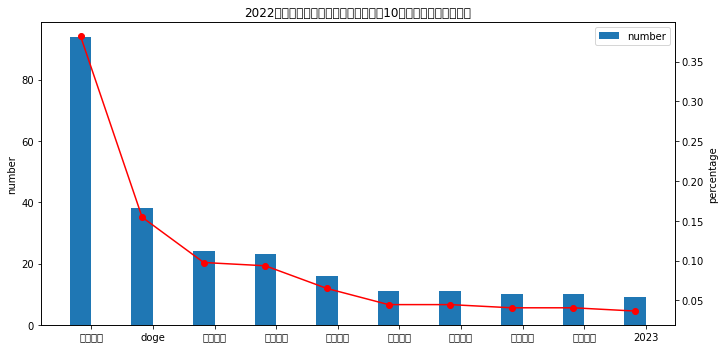

In [44]:
#以下为数据可视化，绘制一个双Y轴的关于弹幕中出现频率最高的十个词的数量及其比例
index=list(index)
number=list(number)
percentage=list(b_dict.values())
fig=plt.figure(figsize=(11,7))
ax=fig.add_axes([0.1,0.3,0.8,0.6])

width=0.35
ticks=np.arange(len(index))
ax.bar(ticks,number,width,label='number')
ax2=ax.twinx()
ax2.set_ylabel('percentage')
ax2.plot(index,percentage,marker="o",color="red",label="percentage")
ax.set_ylabel('number')
ax.set_title("2022年高考数学吐槽弹幕中频率最高的10个词的数量及所占比例")#,FontProperties=font_title)
ax.set_xticks(ticks+width/2)
ax.set_xticklabels(index)#,FontProperties=font_words)
ax.legend(loc='best')
plt.show()

<Figure size 432x288 with 0 Axes>

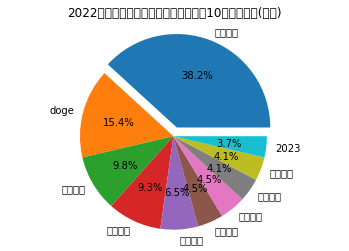

In [45]:
c_dict={'hahahaha':0.39,'doge':0.1467,'jinjinyouwei':0.1158,'litijihe':0.0618,'meihaoxinfu':0.0579,"wucongxiashou":0.0541,
       'sanjiaohanshu':0.0502,"yuxiandingli":0.0463,"shuxuelaoshi":0.0386,"sanfenzhiyi":0.0386}
plt.figure(figsize=(6,4))
fig,ax=plt.subplots()
data=np.array(list(b_dict.values())).astype(float)
explode=[0.1,0,0,0,0,0,0,0,0,0]
explode2=[0,0,0,0,0,0,0,0,0,0]
ax.pie(data,labels=b_dict.keys(),autopct='%.1f%%',explode=explode)#,textprops={"fontproperties":font_words})
ax.set_title("2022年高考数学吐槽弹幕中频率最高的10个词的比例(饼图)")#,FontProperties=font_title)
ax.axis("equal")
plt.show()

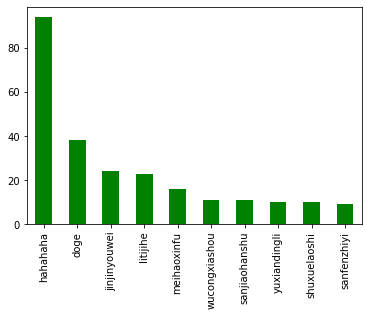

In [46]:
#以下使用了pandas，能够在用更短代码的情况下画出图像
index=[x for x in c_dict.keys()]
df=pd.Series(number,index=index)
df.plot(color='green',kind='bar')
plt.show()

In [47]:
from pyecharts.charts import Map           
from pyecharts import options as opts

In [48]:
#由于b站未公开用户的ip地址，因此数据选用微信视频号上的一个2022高考数学视频的评论用户ip地址，然后进行绘图
provinces=['甘肃','黑龙江','吉林','辽宁','内蒙古','新疆','西藏','青海','宁夏','山西','陕西','北京','河北','山东','河南','江苏',
           '浙江','四川','云南','贵州','广东','广西','海南','湖南','湖北','福建','上海','江西','安徽','天津','重庆']
values=[1.8,4.3,2.1,5.8,2.1,0.7,0.4,0,0.7,0.7,2.5,2.9,5.4,14.9,6.5,8.3,4.3,2.1,1.8,1.1,6.5,1.8,0,4.0,2.5,1.4,2.1,3.3,4.3,1.4,1.1]
themap=(
    Map()
    .add("人数占比",[list(x) for x in zip(provinces,values)],"china")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
             title_opts=opts.TitleOpts(
                     title="2022高考数学评论",
                     subtitle="人数占比（部分）",
                     pos_left="centre"
                                       ),
             legend_opts=opts.LegendOpts(
                     pos_right="right",
                     pos_bottom="Top"
                                         ),
    visualmap_opts=opts.VisualMapOpts(max_=16)
                    )   
       )
themap.render('评论人数分布地图.html')

'C:\\Users\\LZY\\评论人数分布地图.html'